![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
#DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
24966,id_3273,Madrid,"['Mediterranean', 'Spanish', 'Delicatessen', '...",3275.0,$$$$,21.0,"[['Nothing to add', 'Daily breakfast at this r...",/Restaurant_Review-g187514-d10429092-Reviews-R...,d10429092,1,4.0
36438,id_524,Geneva,"['Swiss', 'French', 'Mediterranean', 'European']",527.0,$$ - $$$,19.0,"[['Under new management and excellent', 'Excel...",/Restaurant_Review-g188057-d1045050-Reviews-Sa...,d1045050,1,4.5
7002,id_7002,Geneva,"['French', 'Mediterranean', 'European']",912.0,NaN,2.0,"[[], []]",/Restaurant_Review-g188057-d1044869-Reviews-Bl...,d1044869,0,0.0
49899,id_1061,Edinburgh,"['Chinese', 'Asian', 'Vegetarian Friendly']",1062.0,$,366.0,"[['Good honest food no frills', 'Good food, bu...",/Restaurant_Review-g186525-d2236770-Reviews-Yo...,d2236770,1,3.5
41476,id_8580,London,"['Bar', 'British', 'Pub']",8589.0,$,44.0,"[['Great food', 'Cheap and Cheerful'], ['11/01...",/Restaurant_Review-g186338-d7238562-Reviews-Th...,d7238562,1,3.5


In [14]:
print(type(data.Reviews[1]))
data.Reviews[1]

<class 'str'>


"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [15]:
data.Reviews.value_counts()

[[], []]                                                                                                                              8112
[['Very cozy!', 'Service rate: 1'], ['01/17/2016', '11/18/2015']]                                                                        2
[['Improve your service', 'Great value chain restaurant'], ['12/14/2017', '07/30/2017']]                                                 2
[['Whenever in Madrid, we never miss this gem...', 'Underrated sushi restaurant with very good...'], ['04/11/2017', '12/02/2016']]       2
[['Enjoyable restaurant with indoor and outdo...', 'Delicious food'], ['11/04/2017', '10/31/2017']]                                      2
                                                                                                                                      ... 
[["Homely feel, I'm an expat and I feel at ho..."], ['06/14/2017']]                                                                      1
[['Best vegan sushi in town

In [16]:
print(type(data['Cuisine Style'][1]))
data['Cuisine Style'][1]

<class 'str'>


"['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']"

In [17]:
data['Cuisine Style'].value_counts()

['Italian']                                                                                                     1332
['French']                                                                                                      1019
['Spanish']                                                                                                      860
['French', 'European']                                                                                           503
['Cafe']                                                                                                         500
                                                                                                                ... 
['Austrian', 'Bar', 'European', 'Pub', 'Central European', 'German', 'International', 'Vegetarian Friendly']       1
['Bar', 'Pub', 'Wine Bar', 'Argentinean', 'South American']                                                        1
['European', 'British', 'Delicatessen']                         

In [18]:
#Смотрим,сколько значений в City
data['City'].value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

In [18]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [19]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [20]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [21]:
# Далее заполняем пропуски 1, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(1, inplace=True)

In [22]:
#Заполнить пропуски в Price Range строкой с самым популярным значением
data['Price Range'] = data['Price Range'].fillna('$$ - $$$')

In [23]:
#Заполнить пропуски в Cuisine Style строкой с пустым списком
data['Cuisine Style'] = data['Cuisine Style'].fillna('[]')

In [25]:
#Заполнить пропуски в Reviews строкой с пустым списком списков
data['Reviews'] = data['Reviews'].fillna('[[], []]')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  object 
 1   City                     50000 non-null  object 
 2   Cuisine Style            50000 non-null  object 
 3   Ranking                  50000 non-null  float64
 4   Price Range              50000 non-null  object 
 5   Number of Reviews        50000 non-null  float64
 6   Reviews                  50000 non-null  object 
 7   URL_TA                   50000 non-null  object 
 8   ID_TA                    50000 non-null  object 
 9   sample                   50000 non-null  int64  
 10  Rating                   50000 non-null  float64
 11  Number_of_Reviews_isNAN  50000 non-null  uint8  
dtypes: float64(3), int64(1), object(7), uint8(1)
memory usage: 4.2+ MB


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [27]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    3
Number of Reviews           1574
Reviews                    41857
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [30]:
#признак 1 - столтца, 0 - не столица, численность населения в городах тыс.человек,
#средняя зарплата в стране в долларах, количество (тыс.человек) гостей в гостиницах в 2018 году 
population_city = {'London': [1, 8173.921, 2703, 38664],
                'Paris': [1, 2240.676, 3332, 89322],      
                'Madrid': [1, 3155.368, 2133, 82808],
                'Barcelona': [0, 1628.552, 2133, 82808], 
                'Berlin': [1, 3326.095, 4392, 38881], 
                'Milan': [0, 1331.586, 2726, 61567],
                'Rome': [1, 2870.515, 2726, 61567],
                'Prague': [1, 1272.783, 1454, 36268],
                'Lisbon': [1, 547.828, 1288, 16186], 
                'Vienna': [1, 1765.700, 2940, 30816], 
                'Amsterdam': [1, 825.125, 3238, 18780],
                'Brussels': [1, 144.835, 3930, 11715], 
                'Hamburg': [0, 1718.187, 4392, 38881], 
                'Munich': [0, 1364.992, 4392, 38881], 
                'Lyon': [0, 496.373, 3332, 89322],    
                'Stockholm': [1, 1981.339, 2893, 7440], 
                'Budapest': [1, 1744.710, 1187, 17552], 
                'Warsaw': [1, 1720.442, 1253, 14283], 
                'Dublin': [1, 506.304, 3671, 10926],
                'Copenhagen': [1, 1246.655, 6192, 12749],
                'Athens': [1, 3168.940, 1203, 30123],
                'Edinburgh': [0, 468.163, 2703, 38664],
                'Zurich': [0, 402.294, 3930, 11715], 
                'Oporto': [1, 259.059, 1288, 16186],
                'Geneva': [0, 196.173, 3930, 11715], 
                'Krakow': [0, 756.266, 1253, 14283],
                'Oslo': [1, 673.519, 5450, 5688], 
                'Helsinki': [1, 574.679, 3908, 3224], 
                'Bratislava': [1, 413.207, 1283, 4869],
                'Luxembourg': [1, 76.472, 5854, 1018],
                'Ljubljana': [1, 277.597, 1914, 4425]} 
    
#добавили столбец с численностью населения городов
data['population'] = data.City.apply(lambda x: population_city[x][1])
    
#добавили столбец с признаком столицы
data['capital'] = data.City.apply(lambda x: population_city[x][0])
    
#добавили столбец со средней зарплатой в стране в долларах
data['salary'] = data.City.apply(lambda x: population_city[x][2])
    
#добавили столбец с количеством тыс. человек, которые жили в гостиницах в 2018 году 
data['mgzavreby'] = data.City.apply(lambda x: population_city[x][3])

In [31]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,population,capital,salary,mgzavreby
17432,id_1929,London,"['Italian', 'Vegetarian Friendly', 'Gluten Fre...",1933.0,$$ - $$$,171.0,"[['Favourite local restaurant!', 'A splendid T...",/Restaurant_Review-g186338-d2550578-Reviews-Ni...,d2550578,1,4.5,0,8173.921,1,2703,38664
12869,id_452,Ljubljana,"['Steakhouse', 'European']",453.0,$$ - $$$,63.0,"[['Many names for one place', 'Good location, ...",/Restaurant_Review-g274873-d2510196-Reviews-St...,d2510196,1,2.5,0,277.597,1,1914,4425
774,id_774,Prague,[],3698.0,$$ - $$$,1.0,"[[], []]",/Restaurant_Review-g274707-d12998030-Reviews-K...,d12998030,0,0.0,1,1272.783,1,1454,36268
1909,id_1909,London,"['Cafe', 'Mediterranean', 'European', 'Spanish']",6096.0,$$ - $$$,21.0,"[['Big brunch', 'Relaxed and informal atmosphe...",/Restaurant_Review-g186338-d10047724-Reviews-C...,d10047724,0,0.0,0,8173.921,1,2703,38664
43747,id_2102,Madrid,[],2104.0,$$ - $$$,40.0,"[['Gin & Tonic like no other!', 'Exactly how i...",/Restaurant_Review-g187514-d7303776-Reviews-47...,d7303776,1,4.5,0,3155.368,1,2133,82808


In [32]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  object 
 1   Cuisine Style            50000 non-null  object 
 2   Ranking                  50000 non-null  float64
 3   Price Range              50000 non-null  object 
 4   Number of Reviews        50000 non-null  float64
 5   Reviews                  50000 non-null  object 
 6   URL_TA                   50000 non-null  object 
 7   ID_TA                    50000 non-null  object 
 8   sample                   50000 non-null  int64  
 9   Rating                   50000 non-null  float64
 10  Number_of_Reviews_isNAN  50000 non-null  uint8  
 11  population               50000 non-null  float64
 12  capital                  50000 non-null  int64  
 13  salary                   50000 non-null  int64  
 14  mgzavreby             

In [34]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
42338,id_6697,"['Mediterranean', 'Middle Eastern', 'Barbecue'...",6706.0,$,16.0,"[['5* Turkish Meal !!', 'Delicious'], ['08/24/...",/Restaurant_Review-g186338-d4925029-Reviews-Su...,d4925029,1,5.0,...,0,0,0,0,0,0,0,0,0,0
33014,id_2802,"['Italian', 'European', 'Delicatessen']",2804.0,$$ - $$$,6.0,"[[], []]",/Restaurant_Review-g187849-d12860472-Reviews-P...,d12860472,1,4.5,...,0,0,0,0,0,0,0,0,0,0
40159,id_10218,[],10220.0,$$ - $$$,3.0,[['Their famous hot-dog was...disappointing......,/Restaurant_Review-g187147-d11742535-Reviews-M...,d11742535,1,4.0,...,0,0,1,0,0,0,0,0,0,0
21396,id_1896,"['Italian', 'Mediterranean', 'Seafood', 'Veget...",1898.0,$$ - $$$,189.0,"[['Good Food, Nice Place', ""Harry's Bar a grea...",/Restaurant_Review-g187849-d2339817-Reviews-Ha...,d2339817,1,4.0,...,0,0,0,0,0,0,0,0,0,0
26484,id_7872,[],7881.0,$$ - $$$,8.0,"[['Delicious flavours in a basic restaurant', ...",/Restaurant_Review-g186338-d10028267-Reviews-B...,d10028267,1,4.5,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [35]:
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [34]:
# Ваша обработка 'Price Range'

In [36]:
price_range = {'$': 1,
               '$$ - $$$': 2,
               '$$$$': 3}

In [37]:
data['PriceRangeInt'] = data['Price Range'].apply(lambda x: price_range[x])
data['PriceRangeInt'].value_counts()

2    40402
1     7816
3     1782
Name: PriceRangeInt, dtype: int64

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [37]:
# тут ваш код на обработку других признаков

In [39]:
#преобразуем значения стобца Cuisine Style из строки в список
def CuisineStyle_to_list(s):
        if s != '[]':
            l = [c.strip()[1:-1] for c in s[1:-1].split(',')] 
        else: l = ['other']
        return l

data['Cuisine Style'] = data['Cuisine Style'].apply(CuisineStyle_to_list)
    

In [40]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,PriceRangeInt
34822,id_2802,[other],2804.0,$$ - $$$,8.0,"[['Good neighborhood konditorei/coffee shop'],...",/Restaurant_Review-g190454-d10831182-Reviews-N...,d10831182,1,4.0,...,0,0,0,0,0,1,0,0,0,2
23860,id_223,"[Japanese, Sushi, Asian, Soups, Vegetarian Fri...",224.0,$$$$,732.0,"[['Good japanese food but quite expensive', 'A...",/Restaurant_Review-g187849-d1105260-Reviews-Os...,d1105260,1,4.0,...,0,0,0,0,0,0,0,0,0,3
7116,id_7116,"[Italian, European, Pizza, Mediterranean, Vege...",2617.0,$$ - $$$,62.0,"[['Cool place', 'Surprised by negative reviews...",/Restaurant_Review-g187323-d5819147-Reviews-Pe...,d5819147,0,0.0,...,0,0,0,0,0,0,0,0,0,2
10539,id_8120,[other],8129.0,$$ - $$$,3.0,"[['Best of its kind!', 'Brilliant cafe'], ['11...",/Restaurant_Review-g186338-d11842481-Reviews-D...,d11842481,1,5.0,...,0,0,0,0,0,0,0,0,0,2
12550,id_727,"[Cafe, British, Vegetarian Friendly, Vegan Opt...",728.0,$$ - $$$,339.0,"[['So good we came back the next day!', 'Gorge...",/Restaurant_Review-g186338-d1989026-Reviews-Pi...,d1989026,1,4.5,...,0,0,0,0,0,0,0,0,0,2


In [41]:
type(data['Cuisine Style'][0])

list

In [42]:
#добавили столбец с количеством типов кухонь в каждом ресторане
data['count_cuisines'] = data['Cuisine Style'].apply(lambda x: len(x))

In [43]:
data['count_cuisines'].value_counts()

1     20744
2      7794
3      6638
4      5948
5      4482
6      2611
7      1294
8       363
9        93
10       26
11        4
21        1
15        1
13        1
Name: count_cuisines, dtype: int64

In [44]:
#нашли индекс популярности типов кухонь ресторана и добавили соответстующий столбец
def index_popular(s):
    i = 0
    for c in s:
        for p in popular_cuisines: 
            if c == p:    i+=1
    return i

cuisines = []
for s in data['Cuisine Style']:
    if s[0] != 'other':
        cuisines += s
cuisines_s = pd.Series(cuisines)
popular_cuisines = cuisines_s.value_counts().index[:6]
data['IndexPopularCuisines'] = data['Cuisine Style'].apply(index_popular)

In [45]:
print(len(cuisines_s.unique()))
cuisines_s.value_counts().head(11)

125


Vegetarian Friendly    14021
European               12561
Mediterranean           7820
Italian                 7433
Vegan Options           5684
Gluten Free Options     5185
Bar                     4094
French                  3970
Asian                   3786
Pizza                   3502
Spanish                 3456
dtype: int64

In [46]:
data['IndexPopularCuisines'].value_counts()

0    24331
1    11685
2     6274
3     4025
4     2349
5     1016
6      320
Name: IndexPopularCuisines, dtype: int64

In [47]:
popular_cuisines

Index(['Vegetarian Friendly', 'European', 'Mediterranean', 'Italian',
       'Vegan Options', 'Gluten Free Options'],
      dtype='object')

In [48]:
#добавили вручную столбцы по принципу dummy для самых часто встречающихся типов кухонь
for p in popular_cuisines: 
    data[p] = data['Cuisine Style'].apply(lambda x: int(p in x))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  object 
 1   Cuisine Style            50000 non-null  object 
 2   Ranking                  50000 non-null  float64
 3   Price Range              50000 non-null  object 
 4   Number of Reviews        50000 non-null  float64
 5   Reviews                  50000 non-null  object 
 6   URL_TA                   50000 non-null  object 
 7   ID_TA                    50000 non-null  object 
 8   sample                   50000 non-null  int64  
 9   Rating                   50000 non-null  float64
 10  Number_of_Reviews_isNAN  50000 non-null  uint8  
 11  population               50000 non-null  float64
 12  capital                  50000 non-null  int64  
 13  salary                   50000 non-null  int64  
 14  mgzavreby             

In [49]:
#преобразуем значения столбца Reviews из строки в список дат в формате datetime
from datetime import datetime

def Reviews_to_dtlist(s):
    if s != '[[], []]':
        s_dt = s[s.rfind('[')+1:-2].split(',')
        l_dt = [datetime.strptime(c.strip()[1:-1],'%m/%d/%Y') for c in s_dt] 
    else: 
        l_dt = [datetime.strptime('01/01/2017','%m/%d/%Y')] #так как больше всего отзывово было в 2017 году - 41927
    return l_dt

#добавляем новый столбец с преобразованными значениями
data['DateReviews'] = data['Reviews'].apply(Reviews_to_dtlist)

In [50]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,PriceRangeInt,count_cuisines,IndexPopularCuisines,Vegetarian Friendly,European,Mediterranean,Italian,Vegan Options,Gluten Free Options,DateReviews
43937,id_3001,[Italian],3002.0,$$ - $$$,398.0,"[[], []]",/Restaurant_Review-g187791-d11823818-Reviews-R...,d11823818,1,3.5,...,2,1,1,0,0,0,1,0,0,[2017-01-01 00:00:00]
4772,id_4772,[Soups],1305.0,$$ - $$$,4.0,"[['Friendly staff, acceptable coffee, good so....",/Restaurant_Review-g186525-d7271995-Reviews-So...,d7271995,0,0.0,...,2,1,0,0,0,0,0,0,0,"[2016-04-02 00:00:00, 2015-10-12 00:00:00]"
43390,id_1063,"[Brazilian, South American]",1067.0,$$ - $$$,29.0,"[['Good brasil food', 'Nice surprise with good...",/Restaurant_Review-g188113-d1950696-Reviews-Ca...,d1950696,1,4.0,...,2,2,0,0,0,0,0,0,0,"[2017-12-06 00:00:00, 2017-12-04 00:00:00]"
13621,id_10075,[Sushi],10084.0,$,11.0,"[['good cheap noodles and rice dishes', 'Nice ...",/Restaurant_Review-g186338-d8809194-Reviews-It...,d8809194,1,4.0,...,1,1,0,0,0,0,0,0,0,"[2017-07-09 00:00:00, 2017-07-11 00:00:00]"
9585,id_9585,"[Fusion, Street Food, French]",4699.0,$,36.0,"[['Amazing', 'Simplicity'], ['07/06/2016', '06...",/Restaurant_Review-g187147-d7372153-Reviews-Ch...,d7372153,0,0.0,...,1,3,0,0,0,0,0,0,0,"[2016-07-06 00:00:00, 2015-06-21 00:00:00]"


In [51]:
#добавили столбец, сколько дней прошло с даты последнего отзыва
data['last_review'] = data['DateReviews'].apply(lambda d: (datetime.today() - max(d)).days)
#добавили столбец, количество дней отделяет даты публикации отзывов, размещённых на сайте ресторана
data['interval_reviews'] = data['DateReviews'].apply(lambda d: (max(d) - min(d)).days)

In [52]:
data['last_review'].value_counts()

1656    8146
1285     646
1289     568
1286     522
1288     492
        ... 
2758       1
4805       1
2726       1
2630       1
2855       1
Name: last_review, Length: 1976, dtype: int64

In [53]:
data['interval_reviews'].value_counts()

0       14425
1         829
2         629
3         606
4         538
        ...  
1775        1
1455        1
1423        1
1391        1
943         1
Name: interval_reviews, Length: 1310, dtype: int64

In [54]:
data['population'].value_counts()

8173.921    7193
2240.676    6108
3155.368    3813
1628.552    3395
3326.095    2705
1331.586    2694
2870.515    2589
1272.783    1816
547.828     1647
1765.700    1443
825.125     1372
144.835     1314
1718.187    1186
1364.992    1145
496.373     1126
1981.339    1033
1744.710    1021
1720.442     925
506.304      836
1246.655     819
3168.940     776
468.163      745
402.294      685
259.059      642
196.173      590
756.266      554
673.519      488
574.679      475
413.207      380
76.472       263
277.597      222
Name: population, dtype: int64

In [55]:
#добавили столбец - коэффициент, равный отношению ранга ресторана в городе к численности населения в городе
data['ranking_of_population'] = data['Ranking'] / data['population']

In [56]:
data['ranking_of_population'].value_counts()

1.046824     2
1.151448     2
0.281505     1
12.096524    1
1.559784     1
            ..
2.789906     1
1.635625     1
0.499824     1
3.341402     1
0.965387     1
Name: ranking_of_population, Length: 49998, dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  object 
 1   Cuisine Style            50000 non-null  object 
 2   Ranking                  50000 non-null  float64
 3   Price Range              50000 non-null  object 
 4   Number of Reviews        50000 non-null  float64
 5   Reviews                  50000 non-null  object 
 6   URL_TA                   50000 non-null  object 
 7   ID_TA                    50000 non-null  object 
 8   sample                   50000 non-null  int64  
 9   Rating                   50000 non-null  float64
 10  Number_of_Reviews_isNAN  50000 non-null  uint8  
 11  population               50000 non-null  float64
 12  capital                  50000 non-null  int64  
 13  salary                   50000 non-null  int64  
 14  mgzavreby             

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

<AxesSubplot:>

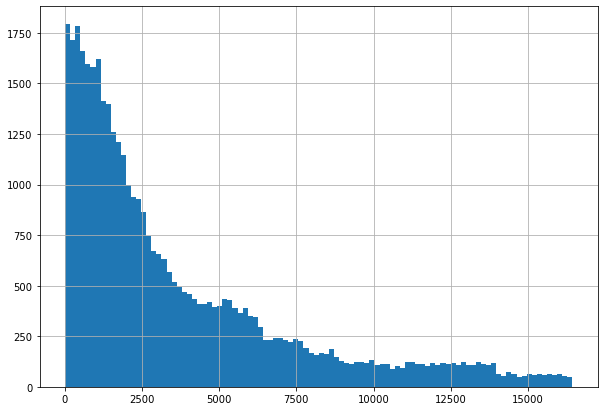

In [58]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

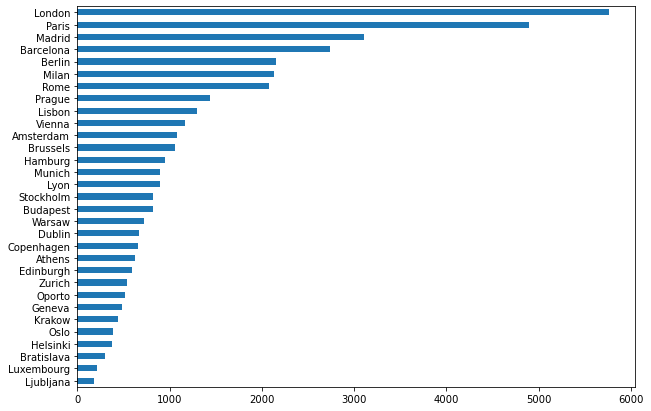

In [59]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

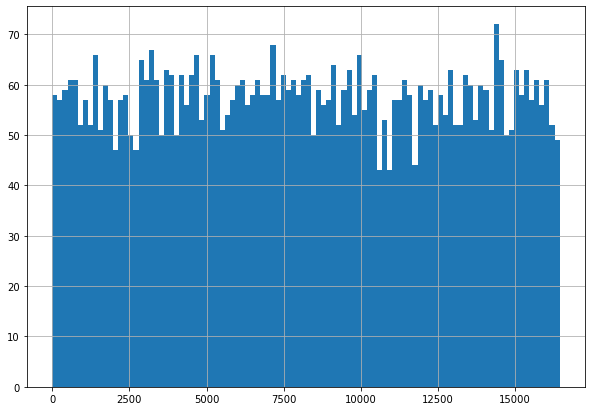

In [60]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

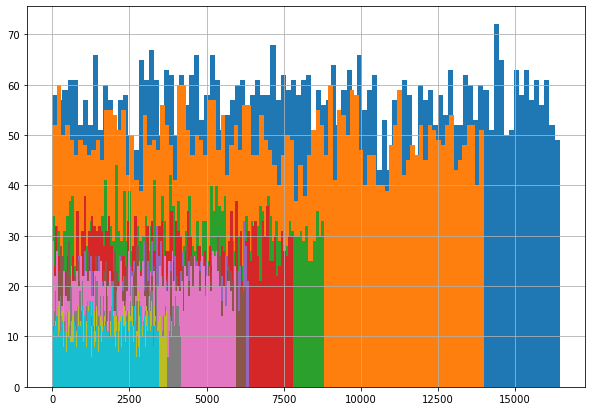

In [61]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


<AxesSubplot:>

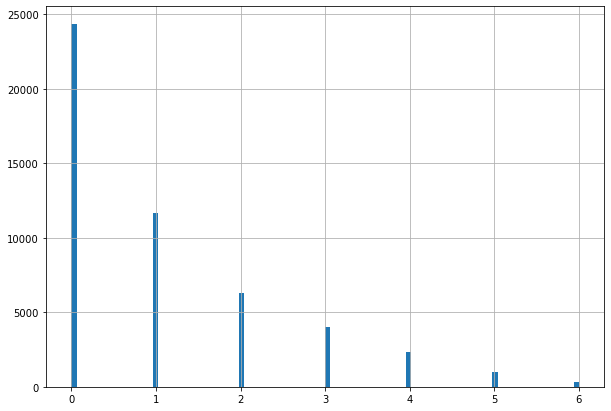

In [62]:
plt.rcParams['figure.figsize'] = (10,7)
data['IndexPopularCuisines'].hist(bins=100)

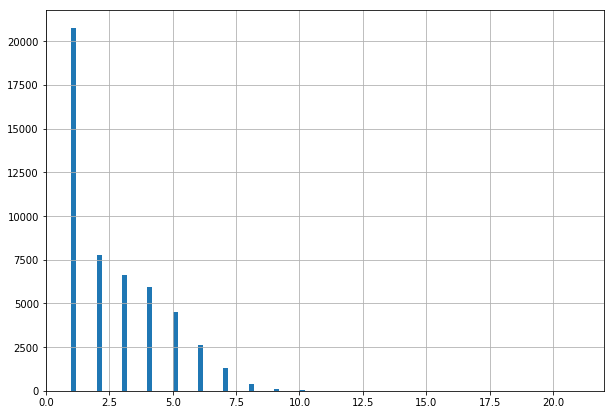

In [62]:
data['count_cuisines'].hist(bins=100)

<AxesSubplot:>

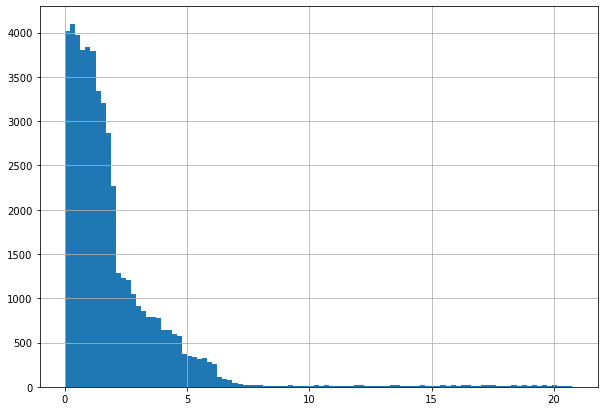

In [63]:
data['ranking_of_population'].hist(bins=100)

### Посмотрим распределение целевой переменной

<AxesSubplot:>

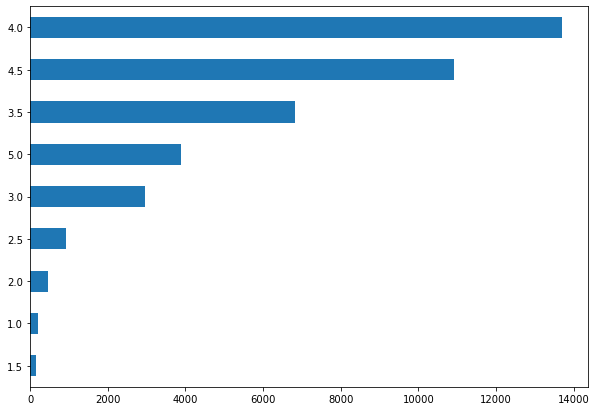

In [64]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

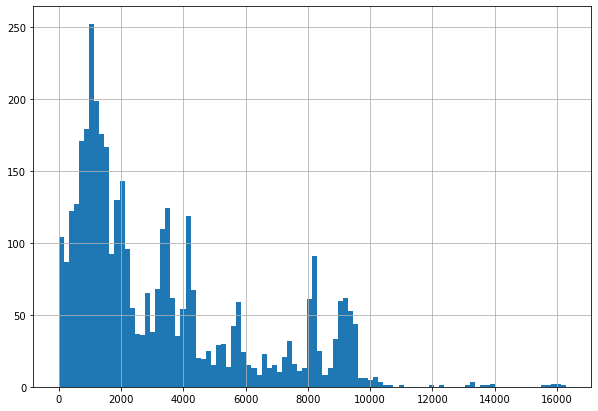

In [65]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

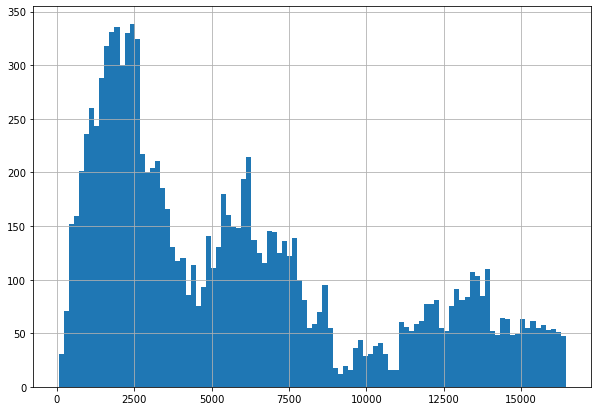

In [66]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

<AxesSubplot:>

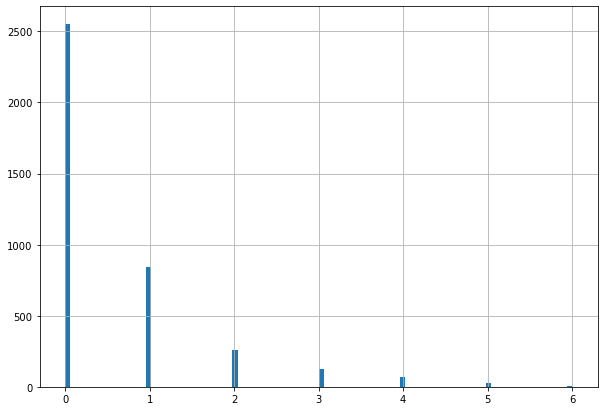

In [67]:
data['IndexPopularCuisines'][data['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

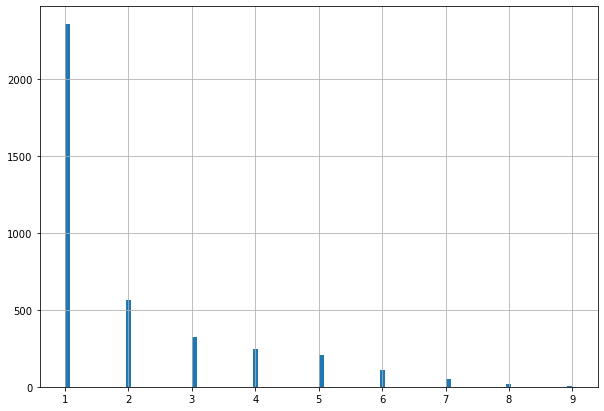

In [68]:
data['count_cuisines'][data['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

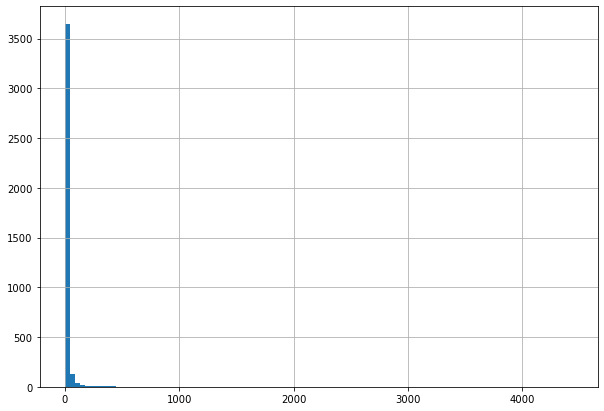

In [69]:
data['Number of Reviews'][data['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

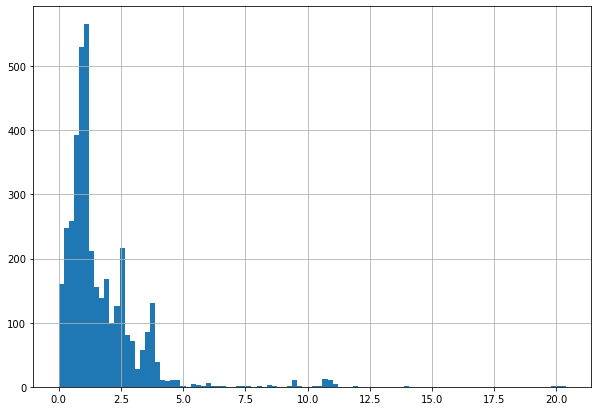

In [70]:
data['ranking_of_population'][data['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

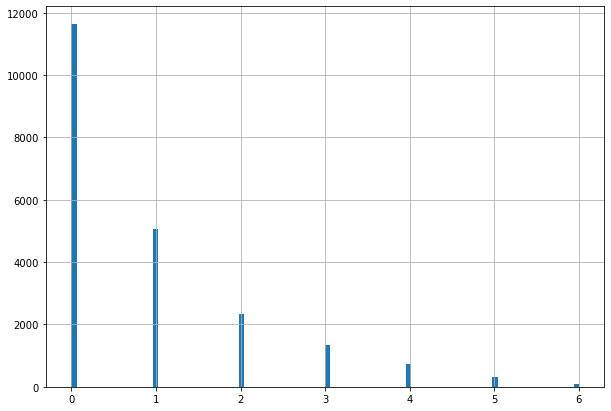

In [71]:
data['IndexPopularCuisines'][data['Rating'] < 4].hist(bins=100)

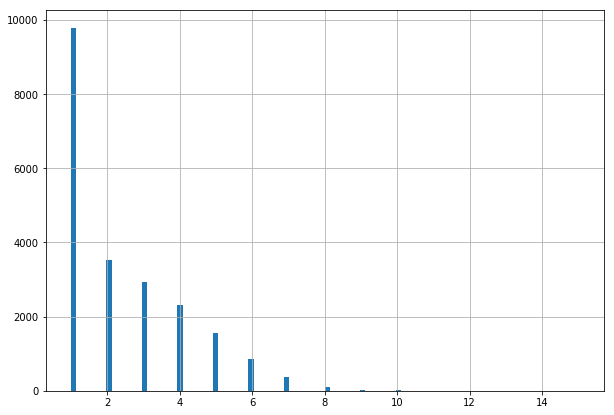

In [72]:
data['count_cuisines'][data['Rating'] < 4].hist(bins=100)

<AxesSubplot:>

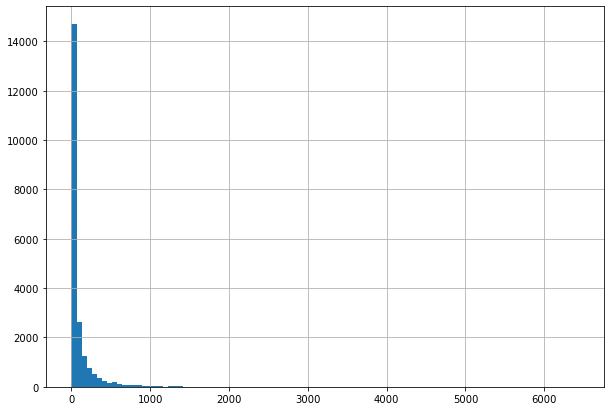

In [72]:
data['Number of Reviews'][data['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

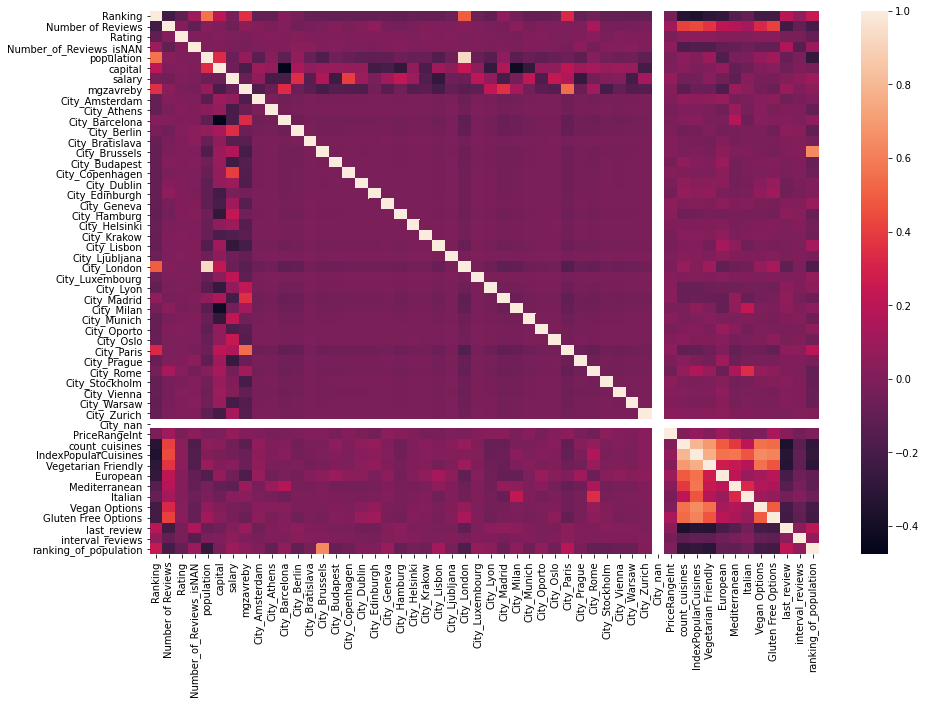

In [73]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [75]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [76]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(1, inplace=True)
    # тут ваш код по обработке NAN
    #Заполнить пропуски в Price Range
    df_output['Price Range'] = df_output['Price Range'].fillna('$$ - $$$')
    #Заполнить пропуски в Cuisine Style 
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna('[]')
    #Заполнить пропуски в Reviews строкой с пустым списком списков
    df_output['Reviews'] = df_output['Reviews'].fillna('[[], []]')
    
    # ################### 3. Encoding ############################################################## 
    #признак 1 - столтца, 0 - не столица, численность населения в городах тыс.человек,
    #средняя зарплата в стране в долларах, количество (тыс.человек) гостей в гостиницах в 2018 году 
    population_city = {'London': [1, 8173.921, 2703, 38664],
            'Paris': [1, 2240.676, 3332, 89322],      
            'Madrid': [1, 3155.368, 2133, 82808],
            'Barcelona': [0, 1628.552, 2133, 82808], 
            'Berlin': [1, 3326.095, 4392, 38881], 
            'Milan': [0, 1331.586, 2726, 61567],
            'Rome': [1, 2870.515, 2726, 61567],
            'Prague': [1, 1272.783, 1454, 36268],
            'Lisbon': [1, 547.828, 1288, 16186], 
            'Vienna': [1, 1765.700, 2940, 30816], 
            'Amsterdam': [1, 825.125, 3238, 18780],
            'Brussels': [1, 144.835, 3930, 11715], 
            'Hamburg': [0, 1718.187, 4392, 38881], 
            'Munich': [0, 1364.992, 4392, 38881], 
            'Lyon': [0, 496.373, 3332, 89322],    
            'Stockholm': [1, 1981.339, 2893, 7440], 
            'Budapest': [1, 1744.710, 1187, 17552], 
            'Warsaw': [1, 1720.442, 1253, 14283], 
            'Dublin': [1, 506.304, 3671, 10926],
            'Copenhagen': [1, 1246.655, 6192, 12749],
            'Athens': [1, 3168.940, 1203, 30123],
            'Edinburgh': [0, 468.163, 2703, 38664],
            'Zurich': [0, 402.294, 3930, 11715], 
            'Oporto': [1, 259.059, 1288, 16186],
            'Geneva': [0, 196.173, 3930, 11715], 
            'Krakow': [0, 756.266, 1253, 14283],
            'Oslo': [1, 673.519, 5450, 5688], 
            'Helsinki': [1, 574.679, 3908, 3224], 
            'Bratislava': [1, 413.207, 1283, 4869],
            'Luxembourg': [1, 76.472, 5854, 1018],
            'Ljubljana': [1, 277.597, 1914, 4425]} 
    
    #добавили столбец с численностью населения городов
    df_output['population'] = df_output.City.apply(lambda x: population_city[x][1])
    
    #добавили столбец с признаком столицы
    df_output['capital'] = df_output.City.apply(lambda x: population_city[x][0])
    
    #добавили столбец со средней зарплатой в стране в долларах
    df_output['salary'] = df_output.City.apply(lambda x: population_city[x][2])
    
    #добавили столбец с количеством тыс. человек, которые жили в гостиницах в 2018 году 
    df_output['mgzavreby'] = df_output.City.apply(lambda x: population_city[x][3])
    
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=['City'], dummy_na=True)
    
    # тут ваш код не Encoding фитчей
    # обработка 'Price Range'
    price_range = {'$': 1,
               '$$ - $$$': 2,
               '$$$$': 3}
    df_output['PriceRangeInt'] = df_output['Price Range'].apply(lambda x: price_range[x])
    
    #преобразуем значения стобца Cuisine Style из строки в список
    def CuisineStyle_to_list(s):
        if s != '[]':
            l = [c.strip()[1:-1] for c in s[1:-1].split(',')] 
        else: l = ['other']
        return l

    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(CuisineStyle_to_list)
    
    #преобразуем значения столбца Reviews из строки в список дат в формате datetime
    def Reviews_to_dtlist(s):
        if s != '[[], []]':
            s_dt = s[s.rfind('[')+1:-2].split(',')
            l_dt = [datetime.strptime(c.strip()[1:-1],'%m/%d/%Y') for c in s_dt] 
        else: 
            l_dt = [datetime.strptime('01/01/2017','%m/%d/%Y')] #так как больше всего отзывово было в 2017 году - 41927
        return l_dt

    #добавляем новый столбец с преобразованными значениями
    df_output['DateReviews'] = df_output['Reviews'].apply(Reviews_to_dtlist)
    
         
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код на генерацию новых фитчей
    #добавили столбец с количеством типов кухонь в каждом ресторане
    df_output['count_cuisines'] = df_output['Cuisine Style'].apply(lambda x: len(x))
    
    #найдем индекс популярности типов кухонь ресторана и добавили столбец
    def index_popular(s):
        i = 0
        for c in s:
            for p in popular_cuisines: 
                if c == p:    i+=1
        return i

    cuisines = []
    for s in df_output['Cuisine Style']:
        if s[0] != 'other':
            cuisines += s
    cuisines_s = pd.Series(cuisines)
    popular_cuisines = cuisines_s.value_counts().index[:4]
    df_output['IndexPopularCuisines'] = df_output['Cuisine Style'].apply(index_popular)
    
    #добавили вручную столбцы по принципу dummy для самых часто встречающихся типов кухонь
    #for p in popular_cuisines: 
       #df_output[p] = df_output['Cuisine Style'].apply(lambda x: int(p in x))
    
        
    #добавили столбец, сколько дней прошло с даты последнего отзыва
    df_output['last_review'] = df_output['DateReviews'].apply(lambda d: (datetime.today() - max(d)).days)
    #добавили столбец, количество дней отделяет даты публикации отзывов, размещённых на сайте ресторана
    df_output['interval_reviews'] = df_output['DateReviews'].apply(lambda d: (max(d) - min(d)).days)
    
    #добавили столбец - коэффициент, равный отношению ранга ресторана в городе к численности населения в городе
    df_output['ranking_of_population'] = df_output['Ranking'] / df_output['population']
   
    # ################### 5. Clean #################################################### 
    # убираем признаки, которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [77]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,population,capital,salary,mgzavreby,City_Amsterdam,City_Athens,...,City_Vienna,City_Warsaw,City_Zurich,City_nan,PriceRangeInt,count_cuisines,IndexPopularCuisines,last_review,interval_reviews,ranking_of_population
32861,1677.0,217.0,1,3.5,825.125,1,3238,18780,1,0,...,0,0,0,0,2,4,0,1345,33,2.032419
40466,11179.0,28.0,1,3.5,2240.676,1,3332,89322,0,0,...,0,0,0,0,2,1,0,1909,207,4.989119
39009,2539.0,35.0,1,4.5,2870.515,1,2726,61567,0,0,...,0,0,0,0,2,4,2,1656,0,0.884510
46613,894.0,17.0,1,4.0,1718.187,0,4392,38881,0,0,...,0,0,0,0,2,1,0,1440,171,0.520316
11010,2582.0,9.0,1,4.0,1765.700,1,2940,30816,0,0,...,1,0,0,0,2,5,2,1656,0,1.462310
16104,11480.0,24.0,1,3.5,2240.676,1,3332,89322,0,0,...,0,0,0,0,2,3,2,1404,135,5.123454
32139,523.0,211.0,1,4.5,468.163,0,2703,38664,0,0,...,0,0,0,0,1,4,1,1291,15,1.117132
28674,7777.0,2.0,1,1.0,1628.552,0,2133,82808,0,0,...,0,0,0,0,2,1,0,1656,0,4.775408
37689,2383.0,25.0,1,2.5,1981.339,1,2893,7440,0,0,...,0,0,0,0,2,1,0,2194,481,1.202722
20016,3962.0,295.0,1,3.5,2240.676,1,3332,89322,0,0,...,0,0,0,0,2,3,1,1317,311,1.768216


In [78]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ranking                50000 non-null  float64
 1   Number of Reviews      50000 non-null  float64
 2   sample                 50000 non-null  int64  
 3   Rating                 50000 non-null  float64
 4   population             50000 non-null  float64
 5   capital                50000 non-null  int64  
 6   salary                 50000 non-null  int64  
 7   mgzavreby              50000 non-null  int64  
 8   City_Amsterdam         50000 non-null  uint8  
 9   City_Athens            50000 non-null  uint8  
 10  City_Barcelona         50000 non-null  uint8  
 11  City_Berlin            50000 non-null  uint8  
 12  City_Bratislava        50000 non-null  uint8  
 13  City_Brussels          50000 non-null  uint8  
 14  City_Budapest          50000 non-null  uint8  
 15  Ci

In [79]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [80]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [81]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 45), (40000, 45), (40000, 44), (32000, 44), (8000, 44))

# Model 
Сам ML

In [82]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [83]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [84]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [85]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20381749999999998


<AxesSubplot:>

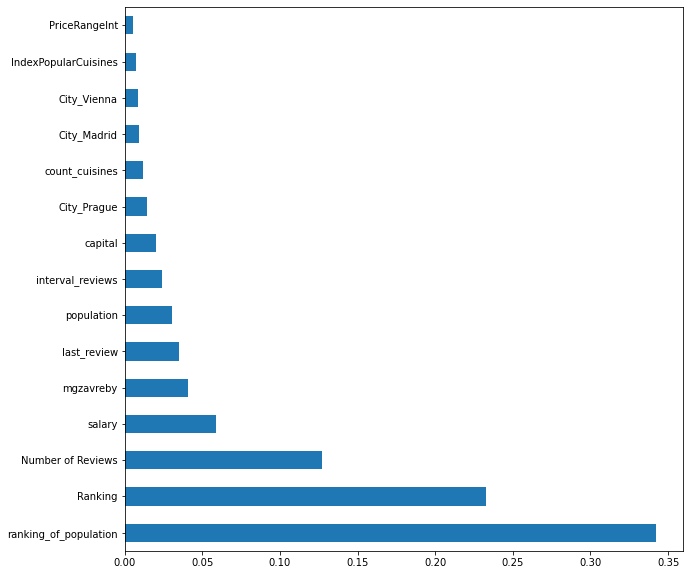

In [86]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [87]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,population,capital,salary,mgzavreby,City_Amsterdam,City_Athens,City_Barcelona,...,City_Vienna,City_Warsaw,City_Zurich,City_nan,PriceRangeInt,count_cuisines,IndexPopularCuisines,last_review,interval_reviews,ranking_of_population
4784,185.0,1698.0,0.0,8173.921,1,2703,38664,0,0,0,...,0,0,0,0,2,4,1,1285,1,0.022633
5648,2188.0,1.0,0.0,1364.992,0,4392,38881,0,0,0,...,0,0,0,0,2,1,0,1656,0,1.602940
7854,33.0,146.0,0.0,496.373,0,3332,89322,0,0,0,...,0,0,0,0,3,4,1,1415,69,0.066482
3653,1854.0,3.0,0.0,1720.442,1,1253,14283,0,0,0,...,0,1,0,0,2,1,0,1656,0,1.077630
6708,485.0,86.0,0.0,673.519,1,5450,5688,0,0,0,...,0,0,0,0,2,5,1,1307,17,0.720098
2885,1447.0,15.0,0.0,402.294,0,3930,11715,0,0,0,...,0,0,1,0,2,2,1,1470,0,3.596872
2856,4696.0,7.0,0.0,1628.552,0,2133,82808,0,0,1,...,0,0,0,0,2,1,0,1656,0,2.883543
5743,375.0,163.0,0.0,3326.095,1,4392,38881,0,0,0,...,0,0,0,0,2,4,2,1404,4,0.112745
2971,12539.0,2.0,0.0,8173.921,1,2703,38664,0,0,0,...,0,0,0,0,2,1,0,1550,77,1.534025
8507,3335.0,30.0,0.0,1628.552,0,2133,82808,0,0,1,...,0,0,0,0,1,5,2,1466,157,2.047831


In [88]:
test_data = test_data.drop(['Rating'], axis=1)

In [89]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [90]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [91]:
predict_submission

array([3.03 , 4.195, 4.395, ..., 3.04 , 4.495, 4.315])

In [92]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.030
1,id_1,4.195
2,id_2,4.395
3,id_3,4.360
4,id_4,4.395
5,id_5,4.305
6,id_6,1.355
7,id_7,2.625
8,id_8,3.915
9,id_9,4.615


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
